In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
import scanpy as sc
sys.path.append('../src')
from spaceoracle.beta import Betabase
from spaceoracle.beta import BetaFrame

In [2]:
# from perplexity import Perplexity
# import json

# perplexity = Perplexity()
# answer = perplexity.search("In a few sentences, describe what the Pax5 gene does.")
# answer = list(answer)
# print(json.loads(answer[-1]['text'])['answer'])
# perplexity.close()

In [2]:
adata = sc.read_h5ad('.cache/day3_lymph_rep_1.h5ad')

In [4]:
betabase = Betabase(adata, '/Users/koush/Downloads/models_v2')

100%|██████████| 840/840 [00:11<00:00, 74.26it/s]


In [49]:
df = BetaFrame.from_path(
    '/Users/koush/Downloads/models_v2/Cd74_betadata.parquet')

In [12]:
import seaborn as sns

In [30]:
df

,beta0,beta_Atf3,beta_Bcl11a,beta_Bcl11b,beta_Cebpb,beta_Ctcf,beta_Ebf3,beta_Egr2,beta_Foxj3,beta_Gata2,...,beta_Ebi3#Stat2,beta_Il21#Stat2,beta_Ebi3#Taf1,beta_Ebi3#Tal1,beta_Il21#Tal1,beta_Il24#Tal1,rctd_cluster,rctd_celltypes,x,y
AAAAAACGGTAGAT,0.698628,0.0,2.132062,-3.084961,-2.211563,0.113640,0.0,0.0,-0.000000,0.0,...,-0.0,0.0,0.021858,0.0,-0.0,-0.0,0,B-cell,-4252.0,2626.2
AAAAAATCCGGCGA,0.440512,0.0,1.638526,-1.256298,-0.000000,-0.309105,-0.0,-0.0,-0.319484,0.0,...,-0.0,0.0,-0.032435,-0.0,0.0,-0.0,4,Tfh,-2952.4,1975.3
AAAAACCGTCAGAC,0.530693,-0.0,2.094794,-2.071248,-1.948385,0.143830,0.0,0.0,-0.000000,0.0,...,-0.0,0.0,-0.041796,-0.0,-0.0,0.0,0,B-cell,-2480.0,1516.6
AAAAACGCTCCGAC,0.522678,-0.0,2.204659,-2.146134,-2.005776,0.143263,0.0,0.0,-0.000000,0.0,...,-0.0,0.0,-0.034322,-0.0,-0.0,0.0,0,B-cell,-2764.1,1255.7
AAAAAGCACGTGTT,0.660951,-0.0,2.062884,-3.050431,-2.091964,0.142253,0.0,0.0,-0.000000,0.0,...,-0.0,0.0,0.003241,0.0,-0.0,-0.0,0,B-cell,-3925.9,1618.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTCGCGGCTA,0.412253,0.0,1.558244,-1.185672,-0.000000,-0.301448,-0.0,-0.0,-0.291560,0.0,...,-0.0,0.0,-0.040997,-0.0,0.0,-0.0,4,Tfh,-3754.4,1504.7
TTTTTTGGGCTGGT,0.260364,0.0,3.815459,-0.929631,-0.000000,-0.000000,-0.0,-0.0,0.000000,-0.0,...,0.0,-0.0,-0.198680,-0.0,0.0,0.0,2,Th2,-3547.4,2483.1
TTTTTTGTACCCAC,0.287895,0.0,3.935919,-1.017917,-0.000000,-0.000000,-0.0,-0.0,0.000000,-0.0,...,0.0,-0.0,-0.182918,-0.0,0.0,0.0,2,Th2,-1666.5,2309.1
TTTTTTGTACGATT,0.541157,-0.0,2.531195,-1.814055,-2.262520,0.110634,0.0,0.0,-0.000000,0.0,...,-0.0,0.0,0.009606,-0.0,-0.0,-0.0,0,B-cell,-2052.1,2937.7


In [41]:
import glob
from tqdm import tqdm


fnames = list(glob.glob('/Users/koush/Downloads/models_v2/*.parquet'))
beta_dict = {}
ligands_set = set()

for path in tqdm(fnames):
    gene_name = path.split('/')[-1].split('_')[0]
    # beta_dict[gene_name] = BetaFrame.from_path(path)
    ligands_set.update(BetaFrame.from_path(path)._all_ligands)

100%|██████████| 2000/2000 [00:28<00:00, 69.90it/s]


In [50]:
from spaceoracle.models.parallel_estimators import received_ligands


rw_ligands = received_ligands(
    xy=adata.obsm['spatial'], 
    lig_df=adata.to_df(layer='imputed_count')[list(ligands_set)],
    radius=200
)

gex_df = adata.to_df(layer='imputed_count')

In [51]:
df2 = df.splash(
        rw_ligands=rw_ligands, 
        gex_df=gex_df
    )

In [57]:
df2['beta_Pax5'].sum()

15063.281876424007

: 

<Axes: xlabel='x', ylabel='y'>

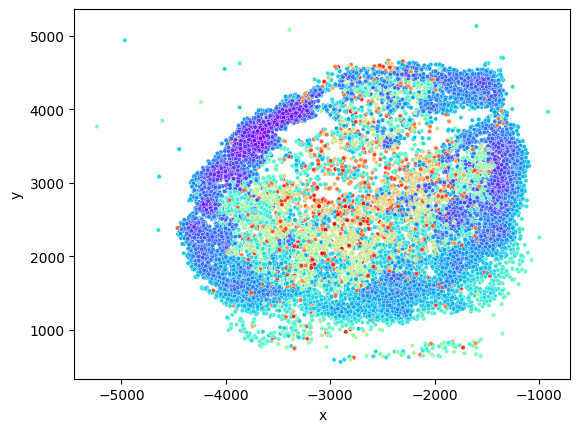

In [54]:
sns.scatterplot(data=df2.join(df[['x', 'y']]), x='x', y='y', s=10, hue='beta_Pax5', palette='rainbow', legend=False)

In [104]:
import glob

In [105]:
adata_train = sc.read_h5ad('.cache/adata_train.h5ad')

In [ ]:
from tqdm import tqdm

In [127]:
fnames = list(glob.glob('/tmp/models/*.parquet'))
beta_dict = {}
ligands_set = set()

for path in tqdm(fnames):
    gene_name = path.split('/')[-1].split('_')[0]
    beta_dict[gene_name] = BetaFrame.from_path(path)
    ligands_set.update(beta_dict[gene_name]._all_ligands)

100%|██████████| 2811/2811 [00:59<00:00, 47.58it/s]


In [141]:
collected = []
collected_genes = []
for k in beta_dict.keys():
    if 'beta_Pax5' in beta_dict[k].modulators_genes:
        collected.append(beta_dict[k]['beta_Pax5'])
        collected_genes.append(k+'_Pax5')


In [168]:
r = pd.concat(collected, axis=1, keys=collected_genes).mean(1).to_frame().join(
    pd.DataFrame(adata_train.obsm['spatial'], columns=['x', 'y'], index=adata_train.obs_names))

<Axes: xlabel='rctd_celltypes'>

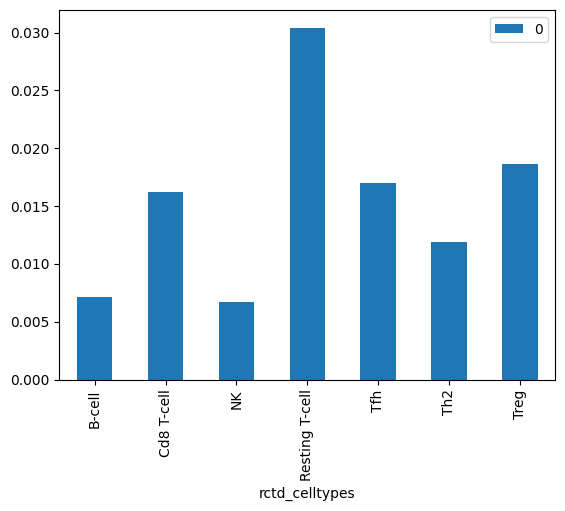

: 

In [176]:
pd.concat(collected, axis=1, keys=collected_genes).mean(1).to_frame().join(
    adata_train.obs['rctd_celltypes']).groupby('rctd_celltypes').mean().plot.bar()

In [147]:
import seaborn as sns

In [153]:
r

,Lyrm7_Pax5,Sod1_Pax5,H2-Ob_Pax5,Zfp566_Pax5,Tpd52_Pax5,Pfdn2_Pax5,Ubqln4_Pax5,Ticam2_Pax5,Eif3g_Pax5,Mmaa_Pax5,...,Arl6ip4_Pax5,Jarid2_Pax5,Txndc15_Pax5,Rbmx2_Pax5,Zfp953_Pax5,Mis12_Pax5,Higd1a_Pax5,Grn_Pax5,x,y
AAAAAACGGTAGAT,0.037375,0.000000,0.066725,0.216297,0.065470,-0.067880,0.152971,-0.114294,-0.070639,0.0,...,0.012443,0.101352,-0.000000,0.208895,0.000000,-0.000000,-0.006210,-0.000000,NaN,NaN
AAAAAATCCGGCGA,-0.000000,-0.246606,0.038477,0.000000,0.013125,0.029791,-0.000000,0.056217,0.090356,-0.0,...,-0.082522,-0.203048,-0.000000,0.060801,0.015550,0.000000,0.000000,-0.039238,NaN,NaN
AAAAACCGTCAGAC,0.051175,0.000000,0.063322,0.215433,0.091228,-0.078750,0.184016,-0.066979,-0.048771,0.0,...,0.002724,0.090887,-0.000000,0.186683,0.000000,0.000000,0.009324,-0.000000,NaN,NaN
AAAAACGCTCCGAC,0.057433,0.000000,0.063646,0.203264,0.093101,-0.076908,0.191452,-0.072037,-0.054328,0.0,...,0.007752,0.088086,-0.000000,0.184650,-0.000000,-0.000000,0.007435,-0.000000,NaN,NaN
AAAAAGCACGTGTT,0.049457,0.000000,0.062476,0.214229,0.082635,-0.079852,0.160121,-0.044943,-0.070687,0.0,...,0.010856,0.099494,-0.000000,0.169938,0.000000,-0.000000,-0.002579,-0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTCGCGGCTA,-0.000000,-0.240910,0.035780,-0.000000,0.012805,0.034420,-0.000000,0.087180,0.079646,-0.0,...,-0.058109,-0.114920,-0.000000,0.060243,0.013103,0.000000,-0.000000,-0.031998,NaN,NaN
TTTTTTGGGCTGGT,-0.002771,-0.000000,0.079461,-0.000000,0.141801,0.277158,-0.008350,-0.000000,-0.103912,-0.0,...,-0.254346,0.001649,0.047540,-0.000000,-0.047415,-0.007140,0.000000,0.000000,NaN,NaN
TTTTTTGTACCCAC,-0.025784,-0.000000,0.090493,-0.000000,0.134529,0.150251,-0.008035,0.000000,-0.111933,-0.0,...,-0.267400,-0.002280,0.055248,-0.000000,-0.038059,-0.029534,0.000000,0.000000,NaN,NaN
TTTTTTGTACGATT,0.012979,0.000000,0.081097,0.153049,0.046992,-0.070882,0.080003,-0.106922,-0.019858,0.0,...,-0.015134,0.086842,-0.000000,0.167807,-0.000000,0.000000,0.012601,-0.000000,NaN,NaN


In [156]:
r

,Lyrm7_Pax5,Sod1_Pax5,H2-Ob_Pax5,Zfp566_Pax5,Tpd52_Pax5,Pfdn2_Pax5,Ubqln4_Pax5,Ticam2_Pax5,Eif3g_Pax5,Mmaa_Pax5,...,Arl6ip4_Pax5,Jarid2_Pax5,Txndc15_Pax5,Rbmx2_Pax5,Zfp953_Pax5,Mis12_Pax5,Higd1a_Pax5,Grn_Pax5,x,y
AAAAAACGGTAGAT,0.037375,0.000000,0.066725,0.216297,0.065470,-0.067880,0.152971,-0.114294,-0.070639,0.0,...,0.012443,0.101352,-0.000000,0.208895,0.000000,-0.000000,-0.006210,-0.000000,NaN,NaN
AAAAAATCCGGCGA,-0.000000,-0.246606,0.038477,0.000000,0.013125,0.029791,-0.000000,0.056217,0.090356,-0.0,...,-0.082522,-0.203048,-0.000000,0.060801,0.015550,0.000000,0.000000,-0.039238,NaN,NaN
AAAAACCGTCAGAC,0.051175,0.000000,0.063322,0.215433,0.091228,-0.078750,0.184016,-0.066979,-0.048771,0.0,...,0.002724,0.090887,-0.000000,0.186683,0.000000,0.000000,0.009324,-0.000000,NaN,NaN
AAAAACGCTCCGAC,0.057433,0.000000,0.063646,0.203264,0.093101,-0.076908,0.191452,-0.072037,-0.054328,0.0,...,0.007752,0.088086,-0.000000,0.184650,-0.000000,-0.000000,0.007435,-0.000000,NaN,NaN
AAAAAGCACGTGTT,0.049457,0.000000,0.062476,0.214229,0.082635,-0.079852,0.160121,-0.044943,-0.070687,0.0,...,0.010856,0.099494,-0.000000,0.169938,0.000000,-0.000000,-0.002579,-0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTCGCGGCTA,-0.000000,-0.240910,0.035780,-0.000000,0.012805,0.034420,-0.000000,0.087180,0.079646,-0.0,...,-0.058109,-0.114920,-0.000000,0.060243,0.013103,0.000000,-0.000000,-0.031998,NaN,NaN
TTTTTTGGGCTGGT,-0.002771,-0.000000,0.079461,-0.000000,0.141801,0.277158,-0.008350,-0.000000,-0.103912,-0.0,...,-0.254346,0.001649,0.047540,-0.000000,-0.047415,-0.007140,0.000000,0.000000,NaN,NaN
TTTTTTGTACCCAC,-0.025784,-0.000000,0.090493,-0.000000,0.134529,0.150251,-0.008035,0.000000,-0.111933,-0.0,...,-0.267400,-0.002280,0.055248,-0.000000,-0.038059,-0.029534,0.000000,0.000000,NaN,NaN
TTTTTTGTACGATT,0.012979,0.000000,0.081097,0.153049,0.046992,-0.070882,0.080003,-0.106922,-0.019858,0.0,...,-0.015134,0.086842,-0.000000,0.167807,-0.000000,0.000000,0.012601,-0.000000,NaN,NaN


<Axes: xlabel='x', ylabel='y'>

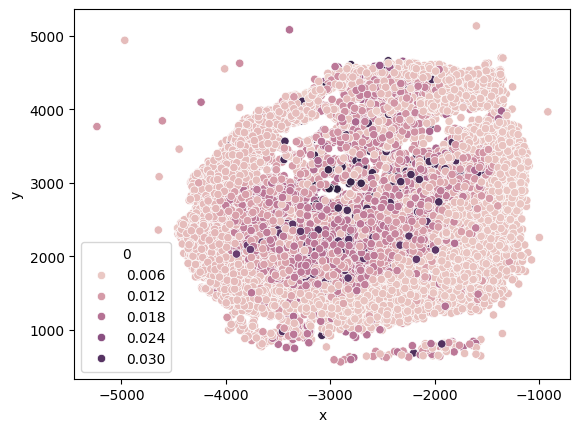

In [169]:
sns.scatterplot(data=r, x='x', y='y', hue=0)

In [128]:
rw_ligands = received_ligands(
    xy=adata_train.obsm['spatial'], 
    lig_df=adata_train.to_df(layer='imputed_count')[list(ligands_set)],
    radius=200
)

gex_df =adata_train.to_df(layer='imputed_count')

In [129]:
for path in tqdm(fnames):
    g = path.split('/')[-1].split('_')[0]
    x_ = beta_dict[g].splash_1(
        rw_ligands=rw_ligands, 
        gex_df=gex_df
    )

100%|██████████| 2811/2811 [03:00<00:00, 15.55it/s]


In [117]:
%%timeit

x_ = beta_dict[g].splash(
        rw_ligands=rw_ligands, 
        gex_df=gex_df
    )

858 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [131]:
x_.sample(20).style.text_gradient(cmap='rainbow', axis=0)

,beta_Angptl2,beta_Angptl4,beta_Atf3,beta_Bach1,beta_Batf3,beta_Bcl11a,beta_Bcl11b,beta_Bclaf1,beta_Bhlhe41,beta_Brf1,beta_C3,beta_C4b,beta_Cebpa,beta_Cebpb,beta_Clcf1,beta_Clock,beta_Cr2,beta_Crebzf,beta_Csf1,beta_Csf1r,beta_Ctcf,beta_Cxcl12,beta_Cxcl13,beta_Cxcr4,beta_Cxcr5,beta_E2f7,beta_Ebf1,beta_Ebf3,beta_Ebi3,beta_Egr1,beta_Egr2,beta_Egr3,beta_Elk1,beta_Erg,beta_Fos,beta_Fosl2,beta_Gata2,beta_Glis2,beta_Gtf3c2,beta_Hdac2,beta_Heyl,beta_Hic1,beta_Hivep1,beta_Id1,beta_Id2,beta_Igf1,beta_Il15,beta_Il2,beta_Il21,beta_Il21r,beta_Il27ra,beta_Il2ra,beta_Il2rb,beta_Il2rg,beta_Il4,beta_Il4ra,beta_Il6st,beta_Il7,beta_Il7r,beta_Insm1,beta_Irf5,beta_Irf7,beta_Irf8,beta_Irf9,beta_Itga6,beta_Klf13,beta_Klf4,beta_Klf7,beta_Klf9,beta_Lif,beta_Max,beta_Mef2a,beta_Mef2c,beta_Mnt,beta_Ncl,beta_Nfe2l2,beta_Nr2c2,beta_Nr2f2,beta_Nr3c1,beta_Osm,beta_Pax5,beta_Pbx3,beta_Pirb,beta_Pou2f2,beta_Ptn,beta_Pura,beta_Rreb1,beta_Runx1,beta_Runx2,beta_Rxra,beta_Sdc4,beta_Setdb1,beta_Smad1,beta_Stat2,beta_Taf1,beta_Tal1,beta_Tbp,beta_Tcf3,beta_Tcf7l2,beta_Tfe3,beta_Tnfrsf13c,beta_Tnfsf13b,beta_Vezf1,beta_Xbp1,beta_Zbtb17,beta_Zfp263,beta_Zfp740,beta_Zkscan1,beta_Zscan22
GGTGCTGGCCCTTC,0.000000,-0.004248,0.353233,0.050341,0.010934,-0.043381,0.022371,-0.005198,0.109689,0.000000,0.000000,0.000000,-0.073920,-0.119525,-0.009371,-0.003333,0.000000,0.015121,0.001465,0.041105,-0.286797,-0.002637,0.000000,-0.062558,0.000000,0.065580,0.065491,0.000000,-0.012533,-0.146441,-0.172001,0.019865,0.000000,0.122263,0.096088,0.023677,0.000000,0.030742,0.063499,0.156591,0.058569,-0.012409,-0.032253,-0.062150,-0.067207,0.001945,-0.001799,-0.003537,0.012831,0.140739,-0.064890,0.000000,0.000000,0.031218,0.002828,0.291461,-0.003744,-0.000865,0.043640,-0.112727,0.007831,-0.467733,-0.056734,0.137659,0.000000,0.017179,-0.119116,-0.172162,-0.051609,0.003323,0.040247,-0.133708,-0.212274,0.105813,-0.004525,0.070521,0.000000,0.129456,-0.053071,-0.000370,-0.019543,0.000000,0.000000,0.007212,-0.007288,-0.014067,0.091486,-0.027769,0.028678,-0.117066,0.115975,0.000988,0.061487,0.008048,0.000000,0.097549,0.025496,0.002309,0.190448,-0.015415,0.026888,0.006716,-0.046508,-0.050497,0.184234,0.000000,0.000000,-0.044162,0.000000
CCCGAAAACTGTCA,0.000000,-0.002476,0.073783,0.001016,0.044463,-0.036490,0.032417,-0.003535,0.061502,0.000000,0.000000,0.000000,-0.103034,-0.044147,-0.005915,-0.022257,0.000000,-0.023879,0.000968,0.026052,-0.208012,-0.001700,0.000000,-0.034435,0.000000,0.038086,0.076951,0.000000,-0.010136,-0.018832,-0.148363,0.032567,0.000000,0.056616,0.075202,0.023109,0.000000,0.017443,0.054844,0.116122,0.078398,-0.046420,-0.025612,-0.055418,-0.032258,0.001762,-0.001414,-0.002021,0.009470,0.121702,-0.066377,0.000000,0.000000,0.031381,0.006080,0.382373,0.004262,-0.000252,0.043651,-0.039236,0.054919,-0.323310,-0.040315,0.116383,0.000000,0.039738,-0.036122,-0.116060,-0.005969,0.001547,0.042470,-0.113894,-0.207089,0.017584,0.001832,0.042808,0.000000,0.050284,-0.016589,-0.000255,-0.005686,0.000000,0.000000,0.020890,0.004497,-0.012750,0.057438,-0.039666,0.009882,-0.098941,0.073359,0.014001,0.037394,-0.008051,0.000000,0.065328,0.015053,0.001562,0.051845,-0.019945,0.018092,0.005217,-0.006672,-0.094519,0.108304,0.000000,0.000000,-0.026468,0.000000
GTCAGGTGACACTG,0.000000,-0.003449,0.072459,0.035712,0.037174,-0.047257,0.033785,-0.004381,0.070560,0.000000,0.000000,0.000000,-0.017830,-0.017948,-0.004633,-0.027707,0.000000,-0.019302,0.000673,0.027403,-0.221856,-0.001515,0.000000,-0.023554,0.000000,0.023210,0.061926,0.000000,-0.013325,0.029857,-0.148313,0.044151,0.000000,-0.002377,0.049530,0.012387,0.000000,0.012237,0.035728,0.087293,0.083924,-0.044584,-0.023704,-0.076254,-0.038910,0.000578,-0.006014,-0.001496,0.008294,0.085190,-0.066721,0.000000,0.000000,0.026753,0.007120,0.417473,0.002119,-0.000715,0.034646,-0.039945,0.040815,-0.280610,-0.026007,0.111358,0.000000,0.011409,-0.083293,-0.143338,0.021733,0.002037,0.046693,-0.095439,-0.184315,0.002333,0.003922,0.054572,0.000000,0.092439,0.012073,0.000088

In [52]:
bdf.splash(
    gex_df=adata.to_df(layer='imputed_count'), 
    xy=adata.obsm['spatial']
)

,beta_Angptl4,beta_Bcl11a,beta_C3,beta_C4b,beta_Cr2,beta_Csf1,beta_Csf1r,beta_Ebi3,beta_Erg,beta_Foxp3,...,beta_Nfib,beta_Osm,beta_Pax5,beta_Runx2,beta_Rxra,beta_Sdc4,beta_Taf1,beta_Tnfrsf13c,beta_Tnfsf13b,beta_Zfp523
AAAAAACGGTAGAT,0.000010,-0.000950,-0.0,-0.0,-0.0,-0.000093,-0.005318,0.000288,-0.001421,0.015615,...,-0.001065,0.000015,-0.001138,0.012262,7.256228e-07,-0.004674,0.002673,-0.001135,-0.000098,-0.004023
AAAAAATCCGGCGA,-0.000004,-0.031601,-0.0,0.0,0.0,-0.000180,-0.014642,0.000063,-0.000083,-0.004540,...,-0.021817,0.000231,0.006657,0.036909,0.000000e+00,-0.015727,0.010994,0.000000,0.000000,0.000000
AAAAACCGTCAGAC,0.000033,-0.000613,-0.0,-0.0,-0.0,-0.000069,-0.004507,-0.000034,-0.002572,0.027339,...,-0.001430,0.000004,-0.001029,0.014621,3.209319e-04,-0.002435,0.002111,-0.000908,-0.000313,-0.007023
AAAAACGCTCCGAC,0.000029,-0.000963,-0.0,-0.0,-0.0,-0.000056,-0.008250,-0.000192,-0.002635,0.022627,...,-0.001010,0.000030,-0.001430,0.016394,2.273195e-04,-0.002565,0.003238,-0.000537,-0.000291,-0.009777
AAAAAGCACGTGTT,0.000057,-0.001362,-0.0,-0.0,-0.0,-0.000063,-0.010808,0.000198,-0.002788,0.029944,...,-0.002471,0.000012,-0.001842,0.019274,2.223014e-04,-0.005715,0.003913,-0.001140,-0.000177,-0.008614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTCGCGGCTA,0.000365,-0.024830,-0.0,0.0,0.0,-0.000808,-0.041534,-0.001466,-0.000434,-0.003522,...,-0.027212,0.000217,0.006164,0.030978,0.000000e+00,-0.013636,0.005165,0.000000,0.000000,0.000000
TTTTTTGGGCTGGT,0.000013,-0.030365,0.0,-0.0,0.0,-0.000337,-0.020256,-0.002555,0.000000,-0.012733,...,0.004702,0.000459,0.004192,0.047048,1.918845e-02,-0.032496,0.001788,0.000000,0.000000,-0.104555
TTTTTTGTACCCAC,-0.000061,-0.009895,0.0,0.0,0.0,-0.000358,-0.018270,-0.000596,0.000000,-0.003740,...,0.002531,0.000314,0.001530,0.043468,1.467518e-02,-0.024477,0.001450,0.000000,0.000000,-0.156852
TTTTTTGTACGATT,-0.000666,-0.009459,0.0,-0.0,0.0,-0.000529,-0.021356,0.000877,-0.006278,0.004005,...,-0.002448,0.000113,-0.003632,0.037813,-1.584334e-04,-0.023998,0.017460,-0.005058,-0.001606,-0.009798


In [51]:
bdf.splash(
    gex_df=adata.to_df(layer='imputed_count'), 
    xy=adata.obsm['spatial']
).mean(0).sort_values(ascending=False)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


beta_Runx2        0.024595
beta_Il2rb        0.017873
beta_Foxp3        0.008478
beta_Taf1         0.004393
beta_Rxra         0.003182
beta_Klf7         0.002509
beta_Nfib         0.002009
beta_Il27ra       0.001051
beta_Il2          0.000229
beta_Osm          0.000115
beta_Lif          0.000009
beta_Il4ra        0.000000
beta_C3           0.000000
beta_C4b         -0.000011
beta_Il15        -0.000028
beta_Angptl4     -0.000073
beta_Il21        -0.000130
beta_Ebi3        -0.000139
beta_Il4         -0.000139
beta_Csf1        -0.000216
beta_Tnfsf13b    -0.000375
beta_Il7         -0.000534
beta_Erg         -0.000658
beta_Il2rg       -0.000990
beta_Il21r       -0.001015
beta_Tnfrsf13c   -0.001052
beta_Pax5        -0.001994
beta_Cr2         -0.003479
beta_Il6st       -0.004595
beta_Il7r        -0.005719
beta_Bcl11a      -0.006529
beta_Csf1r       -0.008792
beta_Sdc4        -0.013540
beta_Zfp523      -0.030618
dtype: float64

In [83]:
bdf.weigh_ligands(
    gex_df=adata.to_df(layer='imputed_count'), 
    xy=adata.obsm['spatial']
)[bdf.modulators_genes]

,beta_Ackr1,beta_Ackr4,beta_Acvr2a,beta_Angpt2,beta_Angptl4,beta_Atf3,beta_Bcl11a,beta_Bcl11b,beta_Bcl6,beta_Bclaf1,...,beta_Stat2,beta_Taf1,beta_Tal1,beta_Tnfrsf13c,beta_Tnfrsf1a,beta_Tnfsf13b,beta_Tnfsf14,beta_Zbtb17,beta_Zbtb6,beta_Zfp524
AAAAAACGGTAGAT,0.000000,0.000000,0.0,0.0,0.000981,-0.320452,0.397171,-0.256767,0.216155,-0.001554,...,0.006620,0.156506,0.0,0.006428,-0.221195,0.000556,0.000000,0.000000,-0.238871,-0.443935
AAAAAATCCGGCGA,0.145340,-0.335220,0.0,0.0,0.001358,-0.450608,0.433104,-0.014035,0.115154,-0.068741,...,0.124716,-0.015101,0.0,0.054908,-0.240121,0.004474,0.000071,-0.027496,-0.000855,0.000000
AAAAACCGTCAGAC,0.000000,0.000000,0.0,0.0,-0.002402,-0.695259,0.447106,-0.208126,0.356927,0.015254,...,-0.020049,0.137771,0.0,0.012549,-0.563766,0.004332,0.000000,0.000000,-0.397594,-0.637080
AAAAACGCTCCGAC,0.000000,0.000000,0.0,0.0,0.001766,-0.639061,0.445282,-0.212772,0.343034,0.019615,...,-0.022797,0.130751,0.0,0.006830,-0.540682,0.003702,0.000000,0.000000,-0.380032,-0.614458
AAAAAGCACGTGTT,0.000000,0.000000,0.0,0.0,0.000604,-0.683383,0.373567,-0.286393,0.338731,0.011886,...,-0.012717,0.134601,0.0,0.015628,-0.585307,0.002430,0.000000,0.000000,-0.286633,-0.499583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTTCGCGGCTA,2.320121,-4.707244,0.0,0.0,0.005407,-0.472727,0.532211,-0.031584,0.114334,-0.050320,...,0.136480,-0.007001,0.0,0.099650,-0.181900,0.035111,0.000118,-0.016492,0.002821,0.000000
TTTTTTGGGCTGGT,0.000000,0.000000,0.0,0.0,0.000355,-0.543547,0.305349,-0.035020,0.037225,0.062648,...,0.014985,-0.000552,0.0,0.145595,-0.006606,0.006366,-0.000023,0.011021,0.029299,-0.021242
TTTTTTGTACCCAC,0.000000,0.000000,0.0,0.0,0.000495,-0.399346,0.329070,-0.015786,0.039262,0.054385,...,-0.004196,0.000225,0.0,0.082453,-0.005845,0.012271,-0.000028,0.004751,0.022684,-0.021668
TTTTTTGTACGATT,0.000000,0.000000,0.0,0.0,0.007866,-0.398417,0.455640,-0.075533,0.187285,-0.008386,...,0.029484,0.067011,0.0,0.005912,-0.161979,0.001877,0.000000,0.000000,-0.232399,-0.403620


In [63]:
bdf.lr_pairs

['Gdf10$Acvr2a',
 'Ccl8$Ccr2',
 'Ccl6$Ccr2',
 'Ccl7$Ccr2',
 'Ccl2$Ccr2',
 'Ccl4$Ccr5',
 'Ccl5$Ccr5',
 'Ccl8$Ccr5',
 'Ccl20$Ccr6',
 'Ccl8$Ackr4',
 'Ccl2$Ackr1',
 'Ccl5$Ackr1',
 'Ccl7$Ackr1',
 'Ccl8$Ackr1',
 'Ccl11$Ackr1',
 'Cxcl1$Cxcr2',
 'Cxcl1$Ackr1',
 'Cxcl9$Ackr1',
 'Cxcl13$Ackr1',
 'Il2$Il2ra',
 'Il2$Il2rb',
 'Il2$Il2rg',
 'Il4$Il4ra',
 'Il4$Il2rg',
 'Il7$Il7r',
 'Il7$Il2rg',
 'Il15$Il15ra',
 'Il15$Il2rb',
 'Il15$Il2rg',
 'Il21$Il21r',
 'Il21$Il2rg',
 'Il4$Il13ra1',
 'Il4$Il13ra2',
 'Il12b$Il12rb1',
 'Ebi3$Il27ra',
 'Ebi3$Il6st',
 'Lif$Il6st',
 'Osm$Il6st',
 'Osm$Osmr',
 'Il24$Il20rb',
 'Csf1$Csf1r',
 'Lta$Tnfrsf1a',
 'Lta$Ltbr',
 'Tnfsf14$Ltbr',
 'Tnfsf13b$Tnfrsf13c',
 'Angptl4$Itga5',
 'Angptl4$Cdh5',
 'Angptl4$Sdc2',
 'Angptl4$Sdc4',
 'Angpt2$Itga5',
 'C3$Cr2',
 'C3$Itgam',
 'C4b$Cr2',
 'Gzma$F2rl2',
 'Gzma$Pard3',
 'Sema3a$Plxna3',
 'Sema3d$Plxna3',
 'Sema3d$Nrp2']

In [60]:
bdf.weigh_ligands(gex_df=adata.layers['imputed_count'], xy=adata.obsm['spatial'])


IndexError: arrays used as indices must be of integer (or boolean) type